<a href="https://colab.research.google.com/github/ekkalaks/CS642-Digital-Image-Processing-and-Analysis/blob/main/CS653_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ตรวจสอบ Libraly/Module ว่ามี opencv-python ไหม?


> โดยทำการ pip list


> ถ้ามีแล้ว ให้ทำการ Import Module

> cv2 คือ opencv

> numpy ใช้ร่วมกับ opencv ในการทำงาน

> matplotlip.pyplot ใช้ในการแสดงผลรูปภาพ

In [3]:
# import cv2, numpy
import cv2
import numpy as pd
import matplotlib.pyplot as plt 

### การอ่านภาพจากไฟล์มาเป็นอาเรย์

ฟังก์ชันสำหรับอ่านไฟล์รูปภาพใน opencv คือ cv2.imread() ใช้อ่านภาพจากไฟล์เข้ามาเป็นอาเรย์ของ numpy


In [13]:
img = cv2.imread('me_001.jpg')
print(type(img)) # ชนิดออบเจ็กต์ ได้ <class 'numpy.ndarray'>
print(img.shape) # รูปร่างอาเรย์ ได้ (450, 600, 3)
print(img.dtype) # ชนิดข้อมูล ได้ uint8
print(img.min()) # ค่าต่ำสุด ได้ 0
print(img.max()) # ค่าสูงสุด ได้ 255

<class 'numpy.ndarray'>
(720, 720, 3)
uint8
0
255


### ภาพที่อ่านขึ้นมาได้จะอยู่ในรูปของอาเรย์ ๓ มิติ ซึ่งมีความหมายดังนี้

มิติที่ 0: ความสูง มีขนาดเท่ากับจำนวนพิกเซลแนวตั้ง

> มิติที่ 1: ความกว้าง มีขนาดเท่ากับจำนวนพิกเซลแนวนอน


> มิติที่ 2: มีขนาดเป็น 3 แสดงถึงสี ๓ สี (น้ำเงิน, เขียว, แดง)


โดย dtype (ชนิดของข้อมูลภายในอาเรย์) จะเป็น unit8 ซึ่งเป็นค่าจำนวนเต็มที่อยู่ได้แค่ในช่วง 0 ถึง 255 เท่านั้น

:**ข้อควรระวังคือ ๓ สีใน opencv นั้นจะเรียงค่อนข้างแปลกกว่าที่อื่น คือเป็น** [น้ำเงิน, เขียว, แดง] (BGR) ในขณะที่สากลส่วนใหญ่จะเรียงเป็น [แดง, เขียว, น้ำเงิน] (RGB)

และการที่ข้อมูลเป็นอาเรย์ ทำให้การเข้าถึงแนวตั้งมาก่อนแนวนอน คือมิติที่ 0 (มิติแรก) แทนแนวตั้ง คือตามแกน y และมิติถัดมาจึงแสดงแนวนอน แกน x ดังนั้นจึงเป็น (y,x) ไม่ใช่ (x,y) ตรงนี้เป็นเรื่องที่อาจทำให้สับสนเผลอเขียนสลับกันได้ง่าย ต้องทำความเคยชินให้ดี

ในตัวอย่างนี้ขนาดของอาเรย์เป็น (450, 600, 3) จึงหมายถึงสูง ๔๕๐ พิกเซล กว้าง ๖๐๐ พิกเซล มี ๓ สี

### แสดงภาพด้วย matplotlib

opencv เองก็มีฟังก์ชันที่สร้างหน้าต่าง GUI ในการดูภาพ แต่โดยทั่วไปสามารถใช้ matplotlib แทนได้ ดังนั้นในที่นี้จะยังไม่กล่าวถึง เพราะจุดประสงค์หลักคือจะมุ่งไปที่ความสามารถในการแก้ไขและวิเคราะห์ภาพโดยใช้โค้ด ส่วนการใช้ GUI นั้นอาจเขียนถึงทีหลัง

matplotlib มีฟังก์ชัน plt.imshow() ซึ่งใช้แสดงภาพได้ง่ายกว่าที่จะใช้ฟ้งก์​ชันแสดงภาพของ opencv เอง

อย่างไรก็ตาม มีข้อควรระวังดังที่ได้กล่าวไปแล้วคือระบบสีใน opencv จะเรียงเป็น [น้ำเงิน, เขียว, แดง] ในขณะที่สากลปกติรวมถึงใน matplotlib จะเรียงแบบ [แดง, เขียว, น้ำเงิน]

ดังนั้นเมื่อจะนำภาพสีมาแสดงใน matplotlib จะต้องสลับลำดับให้ถูกต้องด้วย ซึ่งก็ทำง่ายๆโดยแค่เติม [:,:,::-1] ลงไป

ตัวอย่าง อ่านภาพนี้

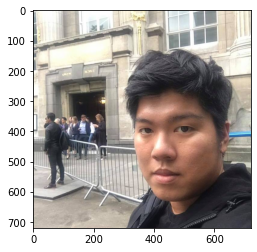

In [14]:
img = cv2.imread('me_001.jpg')
plt.imshow(img[:,:,::-1])
plt.show()

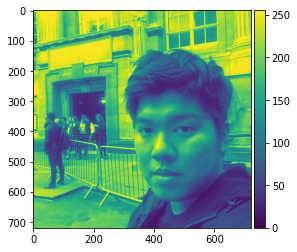

In [16]:
img = cv2.imread('me_001.jpg',0)
plt.imshow(img)
plt.colorbar(pad=0.01) # วาดแถบสีทางขวาเพื่อบอกว่าความเข้มแต่ละจุดที่เห็นเป็นเท่าไหร่ด้วย
plt.show()

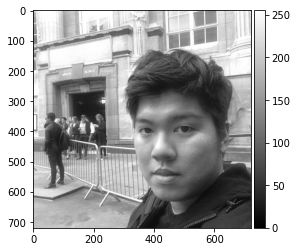

In [17]:
plt.imshow(img,cmap='gray')
plt.colorbar(pad=0.01)
plt.show()